In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv('Fraud.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


# 1. Viewing Basic Description of Data

In [3]:
df.shape

(6362620, 11)

In [4]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [5]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

# 2. Checking Null values

In [6]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

# 3. EDA/Data Viz

### 3.1) Heat Map - To find correlation between each features

C:\Users\gaurav\AppData\Local\Temp\ipykernel_13892\3958498813.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), linewidth='0.2', annot=True)


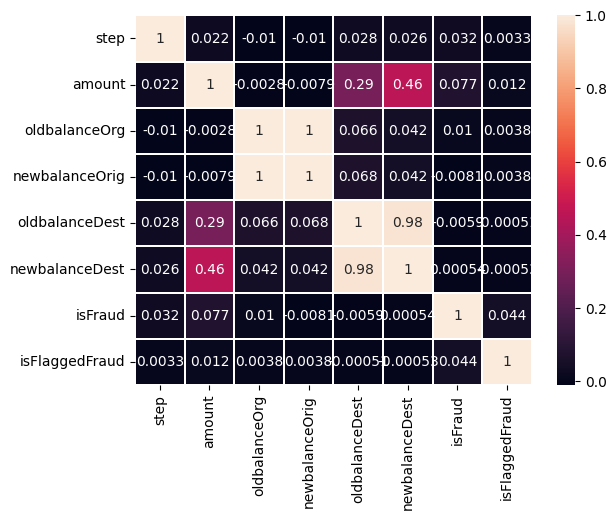

In [7]:
sns.heatmap(df.corr(), linewidth='0.2', annot=True)
plt.show()

#### Conclusion: oldbalanceDest and newbalanceDest show Strong positive correlation

### 3.2) Checking counts of all 'types'

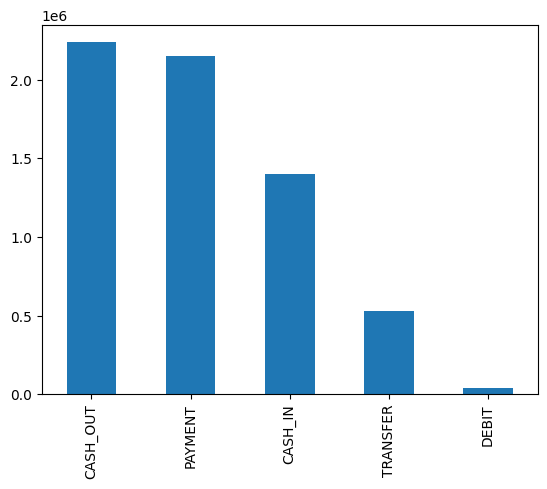

In [8]:
df['type'].value_counts().plot(kind='bar')
plt.show()

#### Conclusion: There are very less transaction of type debit

### 3.3) Viewing percentage of data which is fraud and not fraud

In [9]:
fraud = len(df[df['isFraud'] == 1])
not_fraud = len(df[df['isFraud'] == 0])
total = len(df)

In [10]:
fraud_per = round((fraud*100)/total, 2)
not_fraud_per = round((not_fraud*100)/total, 2)

In [11]:
print(fraud_per, not_fraud_per)

0.13 99.87


#### Conclusion: 
#### 99.87% of the dataset is Not Fraudulent
#### 0.13% of the dataset is Fraudulent

### 3.4) Re-viewing the correlation between oldbalanceDest and newbalanceDest

C:\Users\gaurav\AppData\Local\Temp\ipykernel_13892\1438336874.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['oldbalanceDest'])


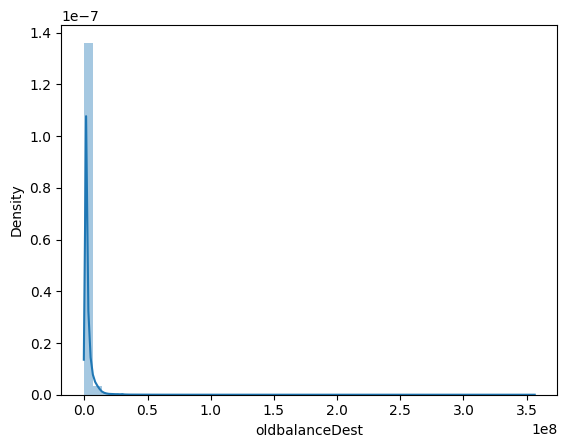

In [12]:
sns.distplot(df['oldbalanceDest'])
plt.show()

C:\Users\gaurav\AppData\Local\Temp\ipykernel_13892\1312220664.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['newbalanceDest'])


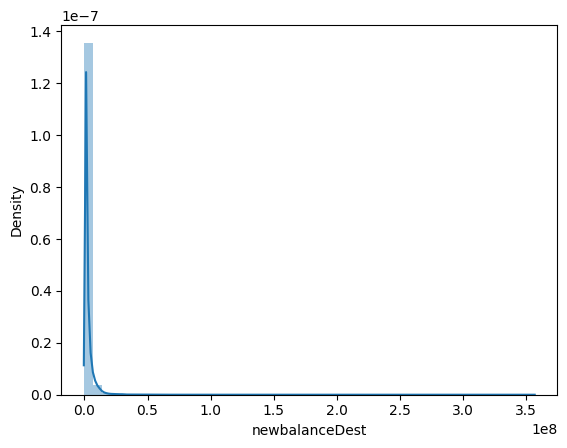

In [13]:
sns.distplot(df['newbalanceDest'])
plt.show()

#### Conclusion: Both the column are highly correlated and the graph is left skewed
Since it is left skewed it is important to remove the outlier to increase the accuracy of the model

# 4. Training and testing split

#### 4.1) Since the dataset is very huge it is better to take a sample of data for processing. For that i'll be random sampling 15% of the data i.e approximately 9,00,000 rows

In [14]:
df_ = df.sample(n=900000, random_state=0)

#### 4.2) Dropping Unwanted columns

In [15]:
df_ = df_.drop(['step', 'isFlaggedFraud'], axis = 1) # axis=1 means columns

#### 4.3) Splitting the dataset

In [16]:
X = df_.drop(['isFraud'], axis=1)
Y = df_['isFraud']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

#### 4.4) Encoding Categorical columns
4.4.a) 'type' column

In [17]:
type_ = preprocessing.LabelEncoder()
type_.fit(df_['type'])
train_type = type_.transform(X_train['type'])
test_type = type_.transform(X_test['type'])

4.4.b) 'nameOrig' column

In [18]:
new_orig = preprocessing.LabelEncoder()
new_orig.fit(df_["nameOrig"])
train_nameOrig = new_orig.transform(X_train["nameOrig"])
test_nameOrig = new_orig.transform(X_test["nameOrig"])

4.4.c) 'nameDest' column

In [19]:
new_dest = preprocessing.LabelEncoder()
new_dest.fit(df_["nameDest"])
train_nameDest = new_dest.transform(X_train["nameDest"])
test_nameDest = new_dest.transform(X_test["nameDest"])

4.4.d) Adding to train and test split

In [20]:
X_train["type"]=train_type
X_train["nameOrig"]=train_nameOrig
X_train["nameDest"]=train_nameDest

X_test["type"]=test_type
X_test["nameOrig"]=test_nameOrig
X_test["nameDest"]=test_nameDest

## 5. Creating Model

#### 5.1) Decision tree Model

In [23]:
decision_tree = DecisionTreeClassifier()

#### 5.2) Randorm Forest Model

In [24]:
rf = RandomForestClassifier()

### 6. Fitting the model

#### 6.1) Decision tree

In [25]:
decision_tree.fit(X_train, Y_train)

DecisionTreeClassifier()

#### 6.2) Random Forest

In [27]:
rf.fit(X_train, Y_train)

RandomForestClassifier()

## 7. Evaluation of model

#### 7.1) Decision tree

In [26]:
Y_pred_dt = decision_tree.predict(X_test)
accuracy_score(Y_test, Y_pred_dt)*100

99.96388888888889

#### 7.2) Random Forest

In [28]:
Y_pred = rf.predict(X_test)
accuracy_score(Y_test, Y_pred)*100

99.97111111111111

Different algorithms such as XGBoost and Linear regression can also be used

From the plot it can be deduced that there is overfitting case
In such cases-
1. Apply Train Test Validate approach
2. Reducing the size of the training dataset 
can be use